# Review
Hi, my name is Dmitry and I will be reviewing your project.

You can find my comments in colored markdown cells:

<div class="alert alert-success">
    If everything is done succesfully.
</div>

<div class="alert alert-warning">
    If I have some (optional) suggestions, or questions to think about, or general comments.
</div>

<div class="alert alert-danger">
    If a section requires some corrections. Work can't be accepted with red comments.
</div>

Please don't remove my comments, as it will make further review iterations much harder for me.

Feel free to reply to my comments or ask questions using the following template:

<div class="alert alert-info">
    For your comments and questions.
</div>

First of all, thank you for turning in the project! Sorry for the delayed review! You did a great job! There are only a couple of small problems (with categorical feature encoding and evaluation on the test set before hyperparameter tuning is finished) that need to be fixed before the project can be accepted, but it should be very straightforward.

# --------------------------------------- Final Project ----------------------------------------------------

we are working for a telecom operator and our project consist in predicting if someone of our customers are planning to leave the company and try to mantain them through promotional codes and offer them special plans. Interconnect's marketing team has information about our clients and are our information source

## 1. Purpose

We should collect this information and analyze how is this information relevant, which of the variables are important whether or not to predict if someone is gonna leave the company. As it seems, we have to modelize by classifying the customers on potencial clients likely to leave. 

# Project Plan

I am organize my self to follow the correct steps to get our purpose
1. [Purpose](#Purpose) The real purspose of our project
2. [EDA](#EDA): explore the data and deal with strange values <br>
    2.1 [Explore Data: analytic table](#Explore-Data:-analytic-table): We will join or merge the tables by customerID and on the left side, respecting the clients table and including the rest of columns to this table<br>
3. [Data Preprocessing](#Data-Preprocessing): depure the values: formats, null values, outliers...etc <br>
4. [Obtain the target variable](#Obtain-the-target-variable) : adapt it to a binary classification (0,1)
5. [Split model](#Split-model): split the table on train and test parts 
6. [Feature Engineering](#Feature-Engineering): Analyze how overfitted is the model, importance of variables. transform the categorical variables to numeric variables
7. [Test on models and evaluate models](#Test-on-models-and-evaluate-models) : plot AUC ROC Curve and get confusion matrix
8. [Tunning Hyperparameters](#Tunning-Hyperparameters) applying GridSearchCv and select variables to our model
9. [Conclusion](#Conclusion) comentaries about the final results

## EDA

###  Explore Data: analytic table

We should get a general overview of the information wue are working on. Our csv files are:
1. Contract information
2. Client's personal data
3. Information about Internet services
4. Information about telephone services 
<br> the column customerID which is present in all the files would be helpful to relate the information from many sources 

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
df_client = pd.read_csv('/datasets/final_provider/personal.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [57]:
display(df_contract.head(5))
display(df_client.head(5))
display(df_internet.head(5))
display(df_phone.head(5))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


We must join the tables by the customerID which is the column in common with all the tables. Let's see the uniques values from the tables and how many unique customers

In [58]:
print('Contract Unique: ', df_contract['customerID'].nunique())
print('Personal Unique: ', df_client['customerID'].nunique())
print('Internet Unique: ', df_internet['customerID'].nunique())
print('Phone Unique: ', df_phone['customerID'].nunique())

Contract Unique:  7043
Personal Unique:  7043
Internet Unique:  5517
Phone Unique:  6361


There is not the same number of id, so it is no complete all the information among the clientes and the service is not exclusive. I would suggest merging with the reference of the clients tables, so to do that we merge from the left side. We have to check which of these clients are present in the rest of the tables

In [59]:
print(f'Customer on contract table \n',df_client['customerID'].isin(df_contract['customerID']).value_counts())
print(f'Clientes on internet table \n',df_client['customerID'].isin(df_internet['customerID']).value_counts())
print(f'Clientes on phone table \n',df_client['customerID'].isin(df_phone['customerID']).value_counts())

Customer on contract table 
 True    7043
Name: customerID, dtype: int64
Clientes on internet table 
 True     5517
False    1526
Name: customerID, dtype: int64
Clientes on phone table 
 True     6361
False     682
Name: customerID, dtype: int64


In [60]:
table1  = pd.merge(df_client, df_contract,on = 'customerID' , how='left')
tabla2 = pd.merge(table1, df_internet,on = 'customerID' , how='left')
df_customers = pd.merge(tabla2, df_phone,on = 'customerID' , how='left')
df_customers.reset_index(drop= True , inplace=True)

As a result, we obtain a final table

In [61]:
df_customers

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,No,No,No,No,No,NaN
7041,8361-LTMKD,Male,1,Yes,No,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Fiber optic,No,No,No,No,No,No,Yes


## Data Preprocessing

### Distribution of variables

 We separate numerical from categorical variables and check the distributions

In [62]:
categorical =df_customers.select_dtypes(include=['object']).columns
numerical = df_customers.select_dtypes(exclude=['object']).columns

In [63]:
df_customers[categorical].describe()

,customerID,gender,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,5517,5517,5517,5517,5517,5517,5517,6361
unique,7043,2,2,2,77,5,3,2,4,6531,2,2,2,2,2,2,2,2
top,6127-ISGTU,Male,No,No,2014-02-01,No,Month-to-month,Yes,Electronic check,20.2,Fiber optic,No,No,No,No,No,No,No
freq,1,3555,3641,4933,366,5174,3875,4171,2365,11,3096,3498,3088,3095,3473,2810,2785,3390


In [64]:
df_customers[numerical].describe()

,SeniorCitizen,MonthlyCharges
count,7043.000000,7043.000000
mean,0.162147,64.761692
std,0.368612,30.090047
min,0.000000,18.250000
25%,0.000000,35.500000
50%,0.000000,70.350000
75%,0.000000,89.850000
max,1.000000,118.750000


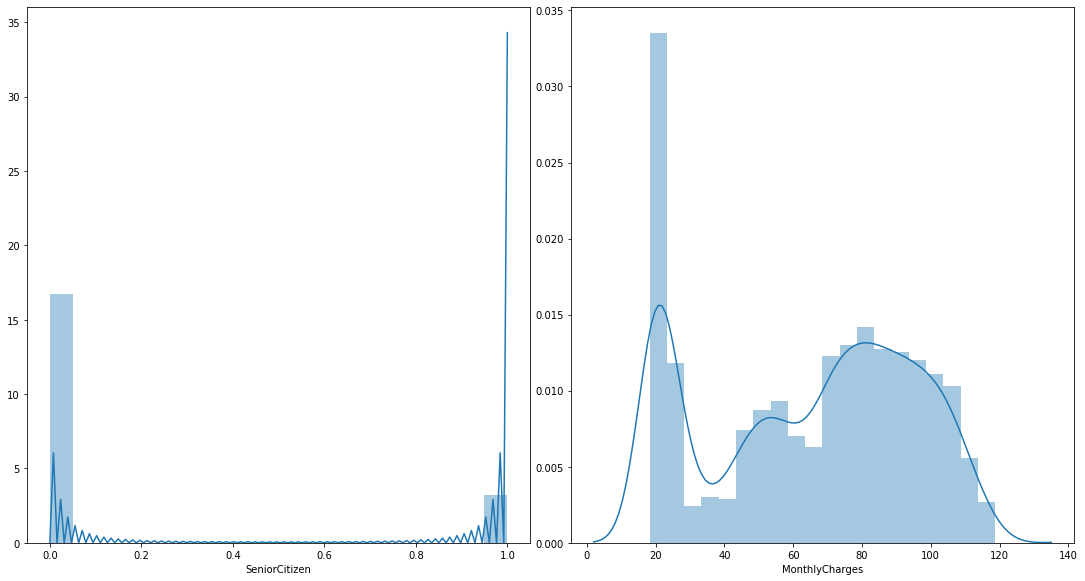

In [65]:
#Numerical Variables
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 8))
axs = axs.flatten() # 

index = 0
for k,v in df_customers[numerical].items(): 
    sns.distplot(v, bins=20, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

we momentally remove the customerID and TotalCharges columns cause it large distribution

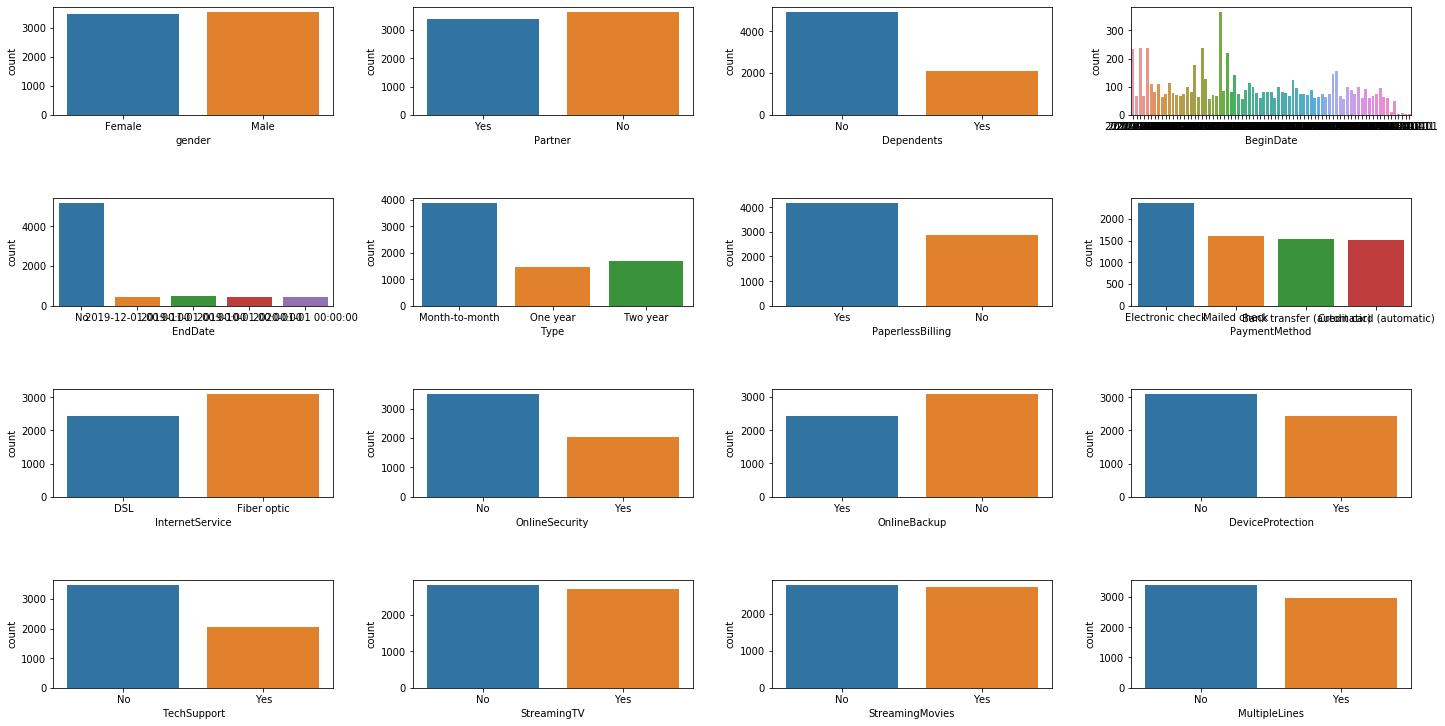

In [66]:
#Categorical Variables
categorical_fit = categorical.drop(['TotalCharges','customerID'])
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 10))
axs = axs.flatten() # 

index = 0
for k,v in df_customers[categorical_fit].items():
    sns.countplot(v, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

####  Comentaries

- Most of the categorical variables has no more than 5 types and for those cases i will mantain them as an object, but for a particular case like TotalCharges  with multiples cases it will required another type of transformation (numerical). In case dates i would extract new variables likes days or months if it has an effect on the future model
- In case of numerical variables, The SeniorCitizen variables present a distribution among zero and one and just a few values between them. so i decide to grouped them in zeros and ones 

### Format

We start with the date formats and adapt them to thid special format

In [67]:
df_customers['BeginDate']= pd.to_datetime(df_customers['BeginDate'], format= '%Y-%m-%d')

We can create a new variable that recopilate the days passed from the beginning to the end (End Date) and for those which have no end we can substitute by 01 Febrary. For this reason we create a new variable.

In [68]:
df_customers['DateEnd'] = df_customers['EndDate']

In [69]:
final_month = pd.to_datetime('2020-02-01', format= '%Y-%m-%d %H:%M:%S')
df_customers['DateEnd'] = df_customers['DateEnd'].replace('No', final_month)
df_customers['DateEnd']= pd.to_datetime(df_customers['DateEnd'], format= '%Y-%m-%d %H:%M:%S')

we add new a column Seniority with the days accumulated and remove DateEnd and BeginDate column

In [70]:
df_customers['Seniority'] = df_customers['DateEnd']-df_customers['BeginDate']
df_customers['Seniority'] = df_customers['Seniority'].astype('timedelta64[D]').astype(int) 

In [71]:
del df_customers['DateEnd']
del df_customers['BeginDate'] 

The 'TotalCharges' column should be transfromed to a numeric date cause of its multiple categorical classification. let's see 
how they are  collected

In [72]:
df_customers['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.9        8
20.05       8
           ..
4740        1
1940.8      1
505.45      1
4563        1
7069.25     1
Name: TotalCharges, Length: 6531, dtype: int64

### Rare Values

We found multiples uniques values, therefore we should treat as a numeric cause we don't have to repair in each of the cases. But the **problem** is that it appears many values int this column with ""

In [73]:
df_customers[df_customers['TotalCharges']==" "][['PaymentMethod','MonthlyCharges']]

,PaymentMethod,MonthlyCharges
488,Bank transfer (automatic),52.55
753,Mailed check,20.25
936,Mailed check,80.85
1082,Mailed check,25.75
1340,Credit card (automatic),56.05
3331,Mailed check,19.85
3826,Mailed check,25.35
4380,Mailed check,20.00
5218,Mailed check,19.70
6670,Mailed check,73.35


we cannot replace them by cero cause there are montly charges. So to make it easy, i substitute by 0 and then make it a numerical column

In [74]:
df_customers['TotalCharges'] = df_customers['TotalCharges'].replace(" ",0)
df_customers['TotalCharges'] = pd.to_numeric(df_customers['TotalCharges'], downcast="float")

Now see how is the distribution

In [75]:
df_customers['TotalCharges'].describe()

count    7043.000000
mean     2279.734375
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: TotalCharges, dtype: float64

I will replace them by the median that will not have a big effect on the distribution

In [76]:
df_customers['TotalCharges'] = df_customers['TotalCharges'].replace(0, df_customers['TotalCharges'].median())

Now we turn on the case of Senior citizen variable. We have to group them into two values 1 and 0. To do that i would round up to the closest value without decimals. This transformation definitively would allow to determine if it is a senior Citizen or not


In [77]:
df_customers['SeniorCitizen'].round(0).value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [78]:
df_customers['SeniorCitizen'] = df_customers['SeniorCitizen'].round(0)

### Null values

In [79]:
df_customers.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
Seniority              0
dtype: int64

Most of the NaN values come from the table of Internet and its type of respone YES/NO maybe could help to replace the NaN values by NO because we have no clue or information about this customers, so we suppose that they don't contract service of internet

In [80]:
df_customers[df_customers['DeviceProtection'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Seniority
11,7469-LKBCI,Male,0,No,No,No,Two year,No,Credit card (automatic),18.95,326.799988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,488
16,8191-XWSZG,Female,0,No,No,No,One year,No,Mailed check,20.65,1022.950012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,1584
21,1680-VDCWW,Male,0,Yes,No,No,One year,No,Bank transfer (automatic),19.80,202.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,365
22,1066-JKSGK,Male,0,No,No,2019-12-01 00:00:00,Month-to-month,No,Mailed check,20.15,20.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,30
33,7310-EGVHZ,Male,0,No,No,No,Month-to-month,No,Bank transfer (automatic),20.20,20.200001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,No,Two year,No,Bank transfer (automatic),20.65,1020.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,1553
7019,9710-NJERN,Female,0,No,No,No,Two year,No,Mailed check,20.15,826.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,1187
7020,9837-FWLCH,Male,0,Yes,Yes,No,Month-to-month,Yes,Electronic check,19.20,239.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,365
7030,0871-OPBXW,Female,0,No,No,No,Month-to-month,Yes,Mailed check,20.05,39.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,62


In [81]:
df_customers['OnlineSecurity'] = df_customers['OnlineSecurity'].replace(np.nan,'No')
df_customers['OnlineBackup'] = df_customers['OnlineBackup'].replace(np.nan,'No')
df_customers['DeviceProtection'] = df_customers['DeviceProtection'].replace(np.nan,'No')
df_customers['TechSupport'] = df_customers['TechSupport'].replace(np.nan,'No')
df_customers['StreamingTV'] = df_customers['StreamingTV'].replace(np.nan,'No')
df_customers['StreamingMovies'] = df_customers['StreamingMovies'].replace(np.nan,'No')
df_customers['MultipleLines'] = df_customers['MultipleLines'].replace(np.nan,'No')

The Internet Service missing values can be replaced by the mode

In [82]:
df_customers['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

In [83]:
df_customers['InternetService'] = df_customers['InternetService'].replace(np.nan, df_customers['InternetService'].mode())

### Outliers

we have to analyze if there is or not outliers from numerical variables

In [84]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float32
InternetService     5517 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
MultipleLines       7043 non-null object
Seniority           7043 non-null int64
dtypes: float32(1), float64(1), int64(2), object(16)
memory usage: 1.0+ M

We distinct again between numerical and categorical variables cause we have created new variables

In [85]:
numerical = df_customers.select_dtypes(exclude=['object']).columns
categorical = df_customers.select_dtypes(include=['object']).columns

In [86]:
df_customers[numerical].describe()

,SeniorCitizen,MonthlyCharges,TotalCharges,Seniority
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,64.761692,2281.912598,985.996166
std,0.368612,30.090047,2265.272217,747.587844
min,0.000000,18.250000,18.799999,0.000000
25%,0.000000,35.500000,402.225006,273.000000
50%,0.000000,70.350000,1394.550049,883.000000
75%,0.000000,89.850000,3786.599976,1676.000000
max,1.000000,118.750000,8684.799805,2191.000000


We are only interest in numericals like 'MonthlyCharges','TotalCharges','Seniority' columns where we can find outliers

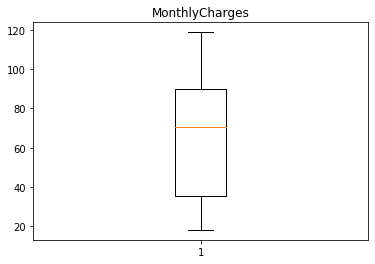

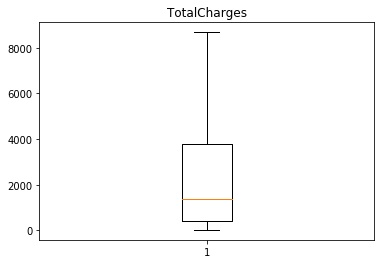

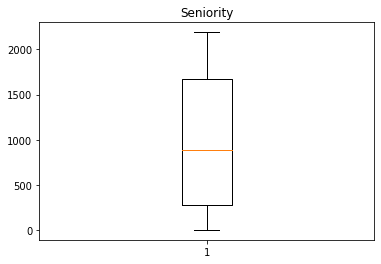

In [87]:
for num in ['MonthlyCharges','TotalCharges','Seniority']:
    plt.boxplot(df_customers[num])
    plt.title(num)
    plt.show()

The visualization of these variables has no suspect of outliers, but just in case we should get the analitical form and see the values.First i create a function that retrieve information from the columns interested in and return NaN values if they are outliers

In [88]:
def outliers(df):
    Q1= df.quantile(0.25)
    Q3= df.quantile(0.75)
    IQR= Q3-Q1
    extreme= Q3+IQR*1.5
    outlier= df.query('@df>@extreme')
    outers= df.where(~df.isin(outlier), np.nan)
    return outers.isna().sum()

In [89]:
problem_data = outliers(df_customers[['MonthlyCharges','TotalCharges','Seniority']])
problem_data

MonthlyCharges    0
TotalCharges      0
Seniority         0
dtype: int64

Finally we can say there are no outliers in our table

<div class="alert alert-success">
    Nice EDA and data preprocessing!
</div>

## Obtain the target variable 

Our main purpose is to obtain a dichotomous variable or binaru target were it is formed only by 1 and 0. we have to relplace the No answers to a 0 

In [90]:
df_customers['churn'] = pd.DataFrame({'churn': (df_customers['EndDate'] != 'No').astype(int)})
del df_customers['EndDate']

## Split model

In [91]:
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from scipy import stats
from datetime import datetime
from sklearn.metrics import normalized_mutual_info_score as nmi
import xgboost as xgb

Now it is time to prepare the model and split into train and test parts.

In [92]:
target= df_customers['churn']
features= df_customers.drop(['churn'], axis=1)
X_train, X_test, y_train, y_test = train_test_split (features, 
                                                     target,
                                                     test_size = 0.3,
                                                     random_state = 12345,
                                                     stratify = target)

In [93]:
print(X_train.shape[0])
print(X_test.shape[0])

4930
2113


In [94]:
df_customers.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MultipleLines', 'Seniority', 'churn'],
      dtype='object')

 Indeed, we must remove customerID column cause it will generate too many columns for each unique id

In [95]:
X_train= X_train.drop(['customerID'], axis=1)
X_test= X_test.drop(['customerID'], axis=1)

In [96]:
df_customers['customerID']

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

<div class="alert alert-warning">
    I would suggest removing CustomerID: it is essentially a random identifier and would only confuse the models. Otherwise the features look good, there doesn't seem to be any target leakage, target feature fits the task. The split into train and test sets is reasonable.
</div>

## Feature Engineering

We must adequat the variables to what our model demands from the dataset and it requires transformations into numerical ones. Before working on the model, we should see how the variables are correlated or teh behaviour against the target variable

In [97]:
numerical = df_customers.select_dtypes(exclude=['object']).columns
categorical = df_customers.select_dtypes(include=['object']).columns

Look at the numerical variables and the relantionship between them

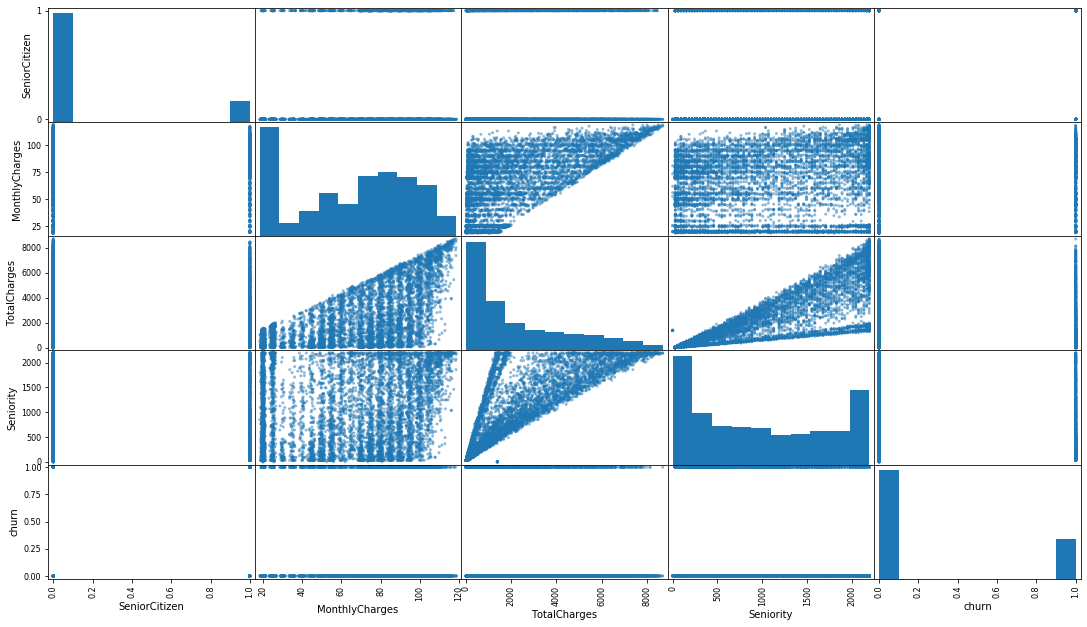

In [98]:
pd.plotting.scatter_matrix(df_customers[numerical])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

It seems that TotalChanges and Seniority (The new variable) are strenthly correlated  and natural correlation with MontlyChanges. The explanation could be that someone who has changes mutiple times is porbabily someona who has been in the company for a long

Now is time to see how the variables behaviour against the target variable

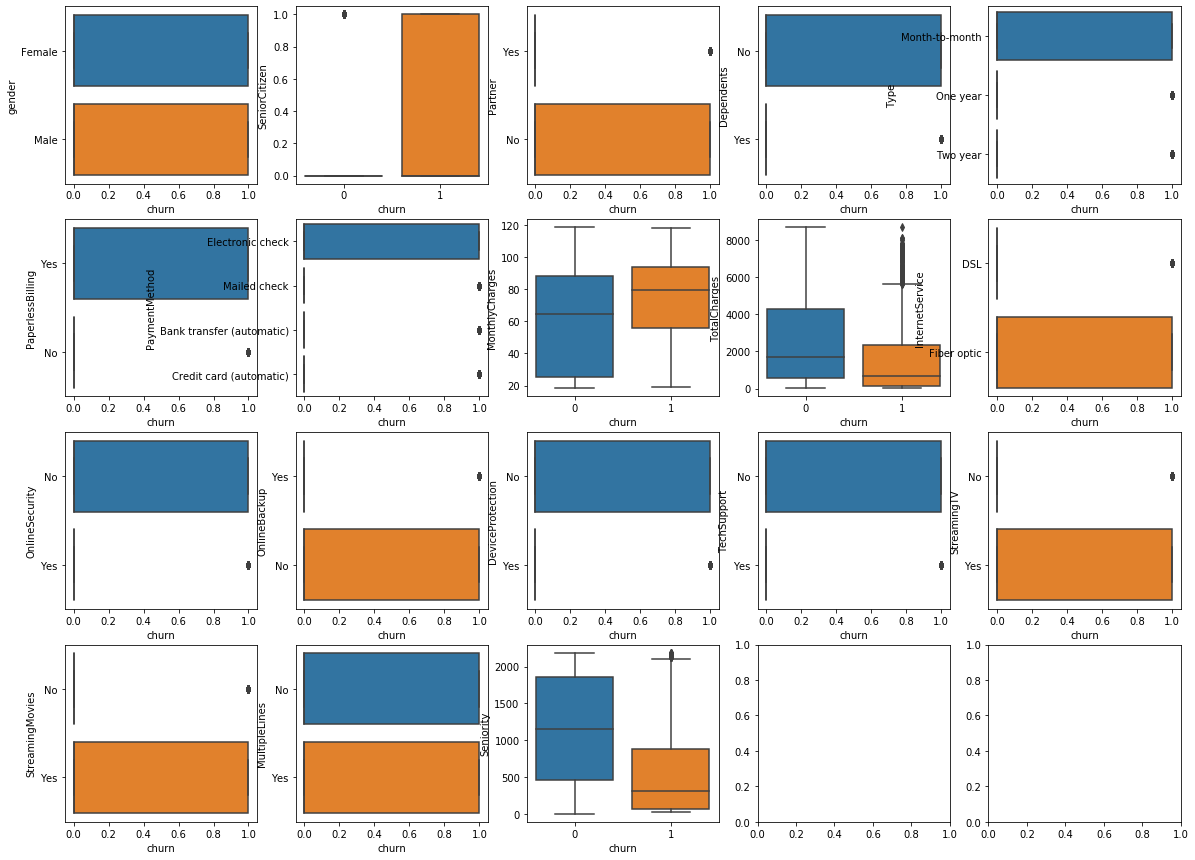

In [99]:
# Variables respose to target
m = df_customers.drop(['customerID'], axis=1)
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20, 15))
axs = axs.flatten()

index = 0
for colname in m:
    if colname != "churn":
        sns.boxplot(ax=axs[index], x="churn", y=colname, data=m)
        index += 1

We have case clearly disbalance against the target respose, like for example the Monthly or Total changes that determines the reason of leaving the company. On the other hand Seniority variable indicates that someone who has been staying for a long time is less probabily to leave the company. Many cases where the type of response are Yes/No answers are not equally distribute and the model will learn better from one side rather than the other. Others like MultipleLines or gender matched between their type of response

### Transformation of variables

We must prepare data for our model and it is necessary to transform into numerical type. It depends on the case of categorical variable type and, in our situation, we can simply use dummies encode to transform into 1 and 0 cause the levels of the categorical ones are a just few of them.

In [100]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test= pd.get_dummies(X_test, drop_first=True)

<div class="alert alert-danger">
    There are a couple of problems here. 
    <ol><li>If there are N unique values in a column col, pd.get_dummies(X[col]) returns N columns.
        <li>A column like CustomerID, in which every value is unique will then spawn a huge amount of columns after one-hot encoding.
        <li>When you do <code>X_train[col] = pd.get_dummies(X_train[col])</code>, you are assigning N columns to just one column. As it is impossible, pandas just assigns the first column. So you lose a lot of information for columns which have more than 2 unique values. Instead, you can just do <code>X_train = pd.get_dummies(X_train)</code>. pd.get_dummies leaves numerical columns untouched.
        <li>When you use pd.get_dummies, you get one extra column which should be deleted. For example, if you have a binary variable Partner, it creates two columns: PartnerYes and PartnerNo, but you either have a partner or not, so one of the columns is redundant. This can be confusing for the models (especially, linear). You can make pd.get_dummies remove excess column by passing a parameter 'drop_first=True'.
</div>

### Train of Models

We are going to use the classic model algorithms of classification and the most popular ones: Logistic Regression, Random Forest, Decision tree and XGBoost. during this time I try to see at first how is the accuracy of the models

In [101]:
model_log = LogisticRegression(random_state=12345, solver='liblinear')
model_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)

In [102]:
model_rf = RandomForestClassifier(random_state=12345)
model_rf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [103]:
model_dt = DecisionTreeClassifier(random_state=12345)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')

In [104]:
model_xgb= xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Let's tune in all the hyperparameter before testing the models

<div class="alert alert-danger">
    Does accuracy make sense as a metric for unbalanced data? Also the models should only be evaluated on the test set after all hyperparameter tuning is finished.
</div>

## Tunning hyperparameters

we focus on the parameters and analyze how the model metrics are improved. We start with logistic Regression model and indicate the parameter class_weight='balanced' and continue with the rest with GridSearch and crossvalidation throught parameters

*Logistic Regression*

In [105]:
model_log = LogisticRegression(random_state=12345, solver='liblinear', class_weight ='balanced')
model_log.fit(X_train, y_train)
predictions = model_log.predict(X_test)

*Decision Tree*

In [116]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":[5, 10, 20], 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":[5, 10, 20], 
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params_tree = tree_cv.best_params_
print(f"Best paramters: {best_params_tree})")

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Best paramters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 2, 'splitter': 'best'})


[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:    5.8s finished


*RandomForest*

In [118]:
n_estimators = [10, 100, 5]
max_features = ['auto', 'sqrt']
max_depth = [10, 50,10]
min_samples_split = [5, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=10, verbose=2, n_jobs=-1)

rf_cv.fit(X_train, y_train)
best_params_rf = rf_cv.best_params_
print(f"Best parameters: {best_params_rf}")

Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=10 
[CV] 

[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.4min finished


Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 100}


*XGBoost*

In [123]:
params = {
    'max_depth': [2,4,6],
    'n_estimators': [50,100,200]
}

estimator = xgb.XGBClassifier(objective='binary:logistic',nthread=4,seed=42)

xgb_clf = GridSearchCV(estimator,params,verbose=1, scoring = 'roc_auc',cv = 10)

xgb_clf.fit(X_train,y_train)
best_params_xg = xgb_clf.best_params_
print(f"Best parameters: {best_params_xg}")

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.6min finished


Best parameters: {'max_depth': 6, 'n_estimators': 200}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

<div class="alert alert-success">
    Good job on tuning the models' hyperparameters!
</div>

## Test on models and evaluate models

We prepare a function which extracts the metrics from the models

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n======================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("______________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("______________________________________________________________________________")
        print(f"ROC AUC score:\n{roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}")
        print("______________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [111]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
#     print(df_eval_stats)

#### Logistic Regression

Test Result:
Accuracy Score: 73.54%
______________________________________________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.905306    0.501126  0.735447     0.703216      0.797997
recall        0.714562    0.793226  0.735447     0.753894      0.735447
f1-score      0.798704    0.614217  0.735447     0.706460      0.749722
support    1552.000000  561.000000  0.735447  2113.000000   2113.000000
______________________________________________________________________________
ROC AUC score:
0.8331673695720087
______________________________________________________________________________
Confusion Matrix: 
 [[1109  443]
 [ 116  445]]



None

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


None

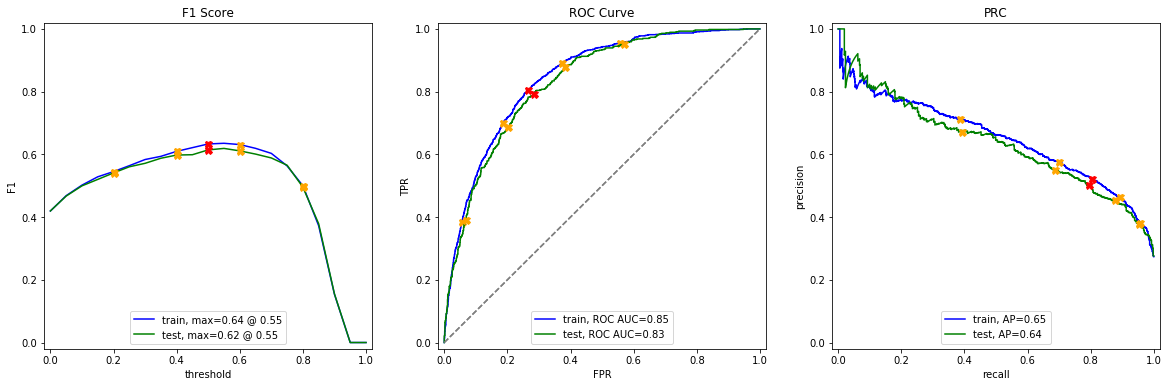

In [112]:
display(print_score(model_log, X_train, y_train, X_test, y_test, train=False))
display(evaluate_model(model_log, X_train, y_train, X_test, y_test))

#### Random Forest

Test Result:
Accuracy Score: 81.35%
______________________________________________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.843824    0.694639  0.813535     0.769231      0.804216
recall        0.915593    0.531194  0.813535     0.723394      0.813535
f1-score      0.878245    0.602020  0.813535     0.740132      0.804907
support    1552.000000  561.000000  0.813535  2113.000000   2113.000000
______________________________________________________________________________
ROC AUC score:
0.8531186256133193
______________________________________________________________________________
Confusion Matrix: 
 [[1421  131]
 [ 263  298]]



None

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


None

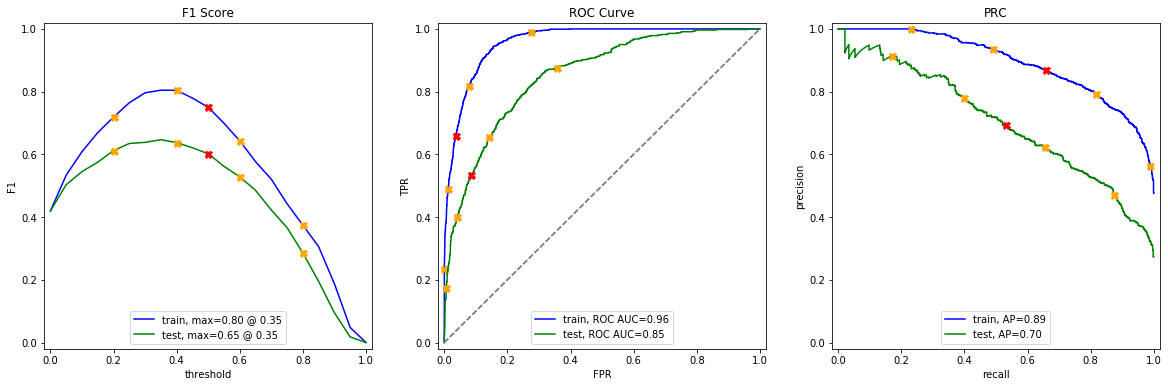

In [119]:
rf_clf = RandomForestClassifier(**best_params_rf)
rf_clf.fit(X_train, y_train)
display(print_score(rf_clf, X_train, y_train, X_test, y_test, train=False))
display(evaluate_model(rf_clf, X_train, y_train, X_test, y_test))

#### Decision Tree

Test Result:
Accuracy Score: 80.17%
______________________________________________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.835009    0.668246  0.801704     0.751628      0.790734
recall        0.909794    0.502674  0.801704     0.706234      0.801704
f1-score      0.870799    0.573754  0.801704     0.722276      0.791933
support    1552.000000  561.000000  0.801704  2113.000000   2113.000000
______________________________________________________________________________
ROC AUC score:
0.8173290286123822
______________________________________________________________________________
Confusion Matrix: 
 [[1412  140]
 [ 279  282]]



None

None

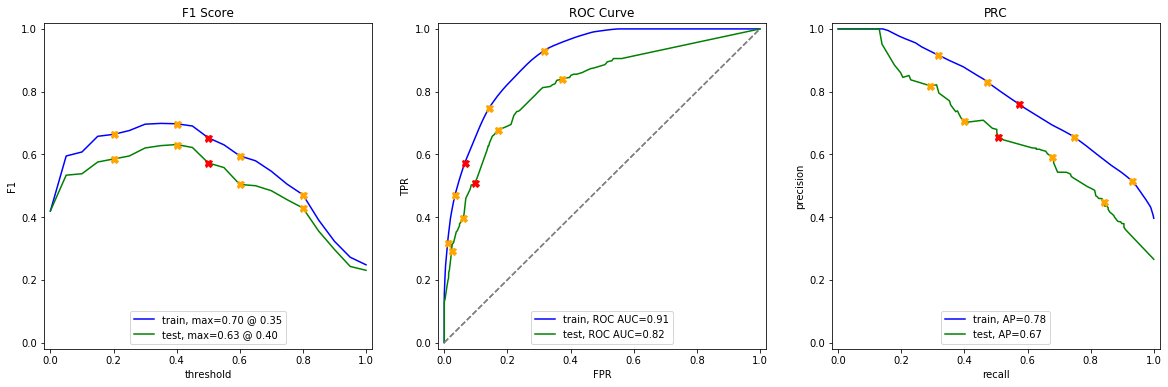

In [120]:
tree_clf = DecisionTreeClassifier(**best_params_tree)
tree_clf.fit(X_train, y_train)
display(print_score(tree_clf, X_train, y_train, X_test, y_test, train=False))
display(evaluate_model(tree_clf, X_train, y_train, X_test, y_test))

#### XGBoost

Test Result:
Accuracy Score: 85.38%
______________________________________________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.871045    0.787671  0.853762     0.829358      0.848909
recall        0.940077    0.614973  0.853762     0.777525      0.853762
f1-score      0.904245    0.690691  0.853762     0.797468      0.847547
support    1552.000000  561.000000  0.853762  2113.000000   2113.000000
______________________________________________________________________________
ROC AUC score:
0.892514632375912
______________________________________________________________________________
Confusion Matrix: 
 [[1459   93]
 [ 216  345]]



None

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


None

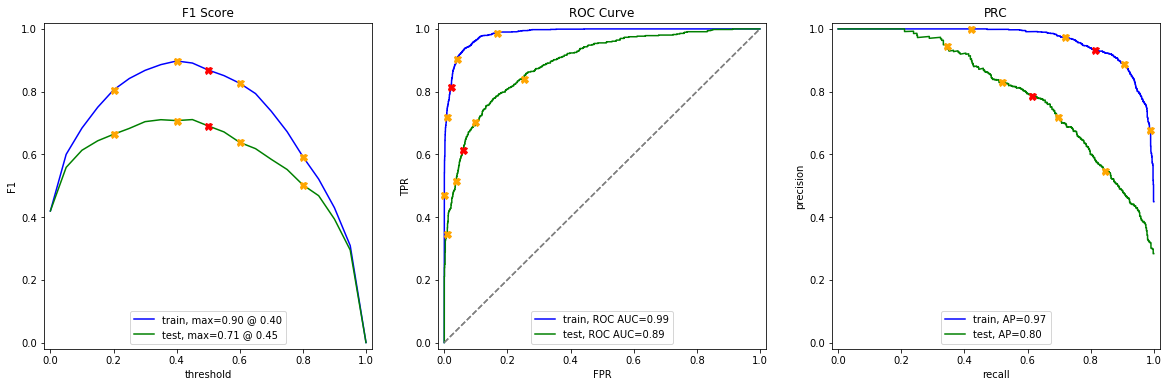

In [124]:
xgb_clf = xgb.XGBClassifier(**best_params_xg)
xgb_clf.fit(X_train, y_train)
display(print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False))
display(evaluate_model(xgb_clf, X_train, y_train, X_test, y_test))

<div class="alert alert-danger">
    Again, the models should only be evaluated on the test set after all hyperparameter tuning is finished.
</div>

In [125]:
from sklearn.metrics import roc_auc_score
models= [('random forest', rf_clf), ('decision tree', tree_clf), ('regresión logística', model_log), ('XGBoost', xgb_clf)]
for i, model in models:
    predictions = model.predict(X_test)
    predict = model.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test, predictions)
    roc = roc_auc_score(y_test, predict)
    accuracy = "%s = %.4f" % (i, round(acc, 2))
    AUC_ROC = "%s = %.4f" % (i, round(roc, 2))
    print('accuracy  {:.>80}'.format(accuracy))
    print('AUC-ROC  {:.>80}'.format(AUC_ROC))

accuracy  ..........................................................random forest = 0.8100
AUC-ROC  ..........................................................random forest = 0.8500
accuracy  ..........................................................decision tree = 0.8000
AUC-ROC  ..........................................................decision tree = 0.8200
accuracy  ....................................................regresión logística = 0.7400
AUC-ROC  ....................................................regresión logística = 0.8300
accuracy  ................................................................XGBoost = 0.8500
AUC-ROC  ................................................................XGBoost = 0.8900


By this time we realise that our metrics have been improved and specially the AUC-ROC metric get really good results and set this value between our target valiues > 0.80. The best model that results is *XGBoost* since it classifies better than the rest in quality (**AUC-ROC ~ 0.89**) and gives the best result (**accuracy ~ 0.86**) in addition to better balancing the detection of false positives and false negatives.

### Overfitting

we prove of the imbalance of our sample

Counts Class 0:  3622
Counts Class 1:  1308
Proportion of class 0:  0.734685598377282
Proportion of class 1:  0.2653144016227181


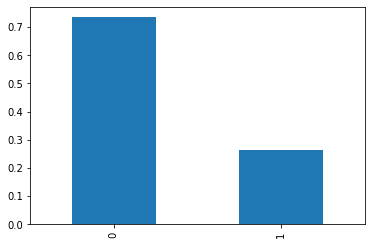

In [126]:
target_count= y_train.value_counts()
print('Counts Class 0: ',target_count[0])
print('Counts Class 1: ',target_count[1])
class_frequency = y_train.value_counts(normalize=True)
print('Proportion of class 0: ',class_frequency[0])
print('Proportion of class 1: ',class_frequency[1])
class_frequency.plot(kind='bar')

Ways to solve this problem we got many options
- Employ cross validation
- Optimize the model parameters with gridSearch.
- Weight adjustment in trees, also in logistic regression using the parameter class_weight = "balanced"

<div class="alert alert-success">
    Great observation!
</div>

### Importance of variables

What if it is possible to level up other model to this one or try to experiment with other variables by adding o removing from the models

In [127]:
feature_list = list(features.columns)
importances = list(xgb_clf.feature_importances_)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: DeviceProtection     Importance: 0.5084999799728394
Variable: MonthlyCharges       Importance: 0.1738000065088272
Variable: PaymentMethod        Importance: 0.06849999725818634
Variable: Partner              Importance: 0.035100001841783524
Variable: customerID           Importance: 0.016499999910593033
Variable: Seniority            Importance: 0.01510000042617321
Variable: OnlineSecurity       Importance: 0.0142000000923872
Variable: TotalCharges         Importance: 0.012900000438094139
Variable: SeniorCitizen        Importance: 0.012799999676644802
Variable: OnlineBackup         Importance: 0.012500000186264515
Variable: MultipleLines        Importance: 0.011800000444054604
Variable: gender               Importance: 0.011699999682605267
Variable: Type                 Importance: 0.010700000450015068
Variable: StreamingTV          Importance: 0.010099999606609344
Variable: TechSupport          Importance: 0.009999999776482582
Variable: Dependents           Importance: 0.008

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Our best model determines that the variable 'DeviceProtection' is truly the most important variable and 
highlight its importance in this model (>50%). The different is so big that the rest of values are close to 5% except Montly Charges which has 17% of importance. We can try to remove 'StreamingMovies' variable

Let's go on Logistic regression where we got worse results and keep in mind that we can play with the variables. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0. It is interesting how depends on variable like 'OnlineSecurity' to predict posisive sides such a 40% percent almost

In [130]:
feature_list = list(features.columns)
importances = list(model_log.coef_[0])
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: OnlineSecurity       Importance: 0.4102
Variable: DeviceProtection     Importance: 0.3611
Variable: TotalCharges         Importance: 0.3144
Variable: customerID           Importance: 0.2722
Variable: Seniority            Importance: 0.1753
Variable: InternetService      Importance: 0.0417
Variable: gender               Importance: 0.013
Variable: SeniorCitizen        Importance: 0.0002
Variable: Partner              Importance: -0.0015
Variable: Dependents           Importance: -0.0506
Variable: Type                 Importance: -0.059
Variable: StreamingMovies      Importance: -0.0707
Variable: StreamingTV          Importance: -0.1457
Variable: OnlineBackup         Importance: -0.1864
Variable: PaperlessBilling     Importance: -0.1945
Variable: MultipleLines        Importance: -0.2906
Variable: TechSupport          Importance: -0.3776
Variable: PaymentMethod        Importance: -0.6703
Variable: MonthlyCharges       Importance: -1.5097


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

We choose using **SelectFromModel module from sklearn library** because select features based on importance weights.

In [139]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=LogisticRegression()).fit(X_train, y_train)
variables = list(np.asarray(list(X_train.columns))[selector.get_support()])
variables

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['SeniorCitizen',
 'Dependents_Yes',
 'Type_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'InternetService_Fiber optic',
 'OnlineSecurity_Yes',
 'TechSupport_Yes']

In [140]:
X_train_op = X_train[variables]
X_test_op =X_test[variables]
model_log = LogisticRegression(random_state=12345, solver='liblinear', class_weight ='balanced')
model_log.fit(X_train_op, y_train)
predictions = model_log.predict(X_test_op)
predict = model_log.predict_proba(X_test_op)[:,1]
acc = accuracy_score(y_test, predictions)
roc = roc_auc_score(y_test, predict)
print('Accuracy: ', acc)
print('AUC-ROC: ', roc)

Accuracy:  0.7051585423568386
AUC-ROC:  0.7982397504456328


Finally we did not reach our mission to improve the logistic regression model, so we keep it as it was with all the features

## Conclusion

Finally we get almost all what we want: reach at least a AUC-ROC score up to 0.80 for all of our models. The best way to handle models and overfitting is using Gridsearch with crossvalidation, because it upgrades our main metric and this means higher quality of our models, and at the same time a good faithful classification. As a resume of the variables, it is significally important the variable Type and determines clearly which of the customers would leave or not